<a href="https://colab.research.google.com/github/vanikanoria/DeepLearning_Fall2021/blob/main/AIT_Deep_learning_Assigment_2_VaniKanoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2021 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv1D, MaxPool1D
import matplotlib.pyplot as plt
# step1 : import LSTM from tensorflow.keras.layers
from tensorflow.keras.layers import LSTM
# step2 : modify the model to have an LSTM instead of the conv1d and maxpooling layers

# CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [3]:
# I downloaded text files of Pride and Prejudice by Jane Austen, and The Adventures of Sherlock Holmes, by Arthur Conan Doyle from the Gutenberg Project website

In [4]:
#downloading pride and prejudice dataset from website
!wget https://www.gutenberg.org/files/1342/1342-0.txt -O text_austen.txt

--2021-11-25 19:08:28--  https://www.gutenberg.org/files/1342/1342-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 798774 (780K) [text/plain]
Saving to: ‘text_austen.txt’

text_austen.txt     100%[===================>] 780.05K  4.52MB/s    in 0.2s    

2021-11-25 19:08:28 (4.52 MB/s) - ‘text_austen.txt’ saved [798774/798774]



In [5]:
#downloading adventures of sherlock homes dataset
!wget https://www.gutenberg.org/files/48320/48320-0.txt -O text_doyle.txt

--2021-11-25 19:08:28--  https://www.gutenberg.org/files/48320/48320-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 622136 (608K) [text/plain]
Saving to: ‘text_doyle.txt’

text_doyle.txt      100%[===================>] 607.55K  3.60MB/s    in 0.2s    

2021-11-25 19:08:28 (3.60 MB/s) - ‘text_doyle.txt’ saved [622136/622136]



## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [6]:
#Make some modifications to the code from Nov 23
#first modication: consider both datasets when considering the vocab
#chars_author1, #chars_author2 and then combine

#cut both texts into 60 charcters 'sentences'
#like binary classification: 0 for author 1, 1 for 2
# for Y, size will be 1 instead of len(cjars)

#Load the data
text_austen = open("text_austen.txt", encoding='utf-8').read().lower()
text_doyle = open("text_doyle.txt", encoding='utf-8').read().lower()

In [7]:
len(text_austen), len(text_doyle)

(774838, 595403)

In [8]:
# Using only the firsy 150,000 characters of each the Jane Austen and Arthur Conan Doyle texts
# since the session crashes if I use the whole thing
text_austen = text_austen[:150000]
text_doyle = text_doyle[:150000]

In [9]:
len(text_austen), len(text_doyle)

(150000, 150000)

In [10]:
#character list: austen
chars_austen = sorted(list(set(text_austen)))
chars_austen

['\n',
 ' ',
 '!',
 '#',
 '&',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'à',
 'ê',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '\ufeff']

In [11]:
#character list: doyle
chars_doyle = sorted(list(set(text_doyle)))
chars_doyle

['\n',
 ' ',
 '!',
 '#',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '£',
 'æ',
 'é',
 'œ',
 '\u2002',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '″',
 '\ufeff']

In [12]:
len(chars_austen), len(chars_doyle)

(61, 67)

In [13]:
#Combine lists and remove duplicates
chars_both = sorted(list(set(chars_austen).union(set(chars_doyle))))
chars_both

['\n',
 ' ',
 '!',
 '#',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '£',
 'à',
 'æ',
 'é',
 'ê',
 'œ',
 '\u2002',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '″',
 '\ufeff']

In [14]:
len(chars_both)


69

In [15]:
#Create character to index and vice versa dictionaries
char_2_index = dict((c,i) for i, c in enumerate(chars_both)) 
index_2_char = dict((i,c) for i, c in enumerate(chars_both))

In [16]:
maxlen = 40 #Length of each sentences
step   = 3  #how much the beginning of each sentence skips over

df = pd.DataFrame
sentences = []
Y = []
is_austen = 0
is_doyle = 1

In [17]:
#if Austen, Y(that sentence) = 0, If Doyle(that sentence), Y = 1
#austen
for i in range(0, len(text_austen)-maxlen, step):
  sentences.append(text_austen[i:i+maxlen])
  Y.append(is_austen)

#doyle
for i in range(0, len(text_doyle)-maxlen, step):
  sentences.append(text_doyle[i:i+maxlen])
  Y.append(is_doyle)

In [18]:
#Create dictionary with sentences and respective author_values
dict1 = {'Sentence': sentences, 'Author':Y}
df = pd.DataFrame(dict1, columns=['Sentence','Author'])

In [19]:
#Shuffle the sentences along with their respective Y-values!
shuffled_df = df.iloc[np.random.permutation(len(df))]

In [20]:
shuffled_df.head(20)

,Sentence,Author
91811,"found sherlock holmes alone, however, ha",1
70299,had a\ngreat sympathy for all red-headed,1
32432,away\n without telling us that you w,0
4740,"ve, he had brought only six with him fro",0
41530,"er. does she live near\n you, sir?”\n",0
23179,"all of them, i think. they all paint ta",0
15053,"“you have a house in town, i conclude?”",0
78742,"gdon street.\n\n“we are close there now,”",1
93680,"her fair personal advantages, and her\nl",1
56497,tried and failed.”\n\n“your majesty must,1


In [21]:
# constructing one hot encodings for df['Sentence']
# Let X = df['Sentence']
X = np.zeros((len(shuffled_df['Sentence']), maxlen, len(chars_both))) # LSTM: no_samples,seq,dimension
for i, sentence in enumerate(shuffled_df['Sentence']):
  for t, char in enumerate(sentence):
    X[i,t,char_2_index[char]] = 1
#and numpy vector for y
#Y = np.array(Y) 

In [22]:

X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [23]:
Y = shuffled_df['Author']
Y

91811    1
70299    1
32432    0
4740     0
41530    0
        ..
85746    1
28009    0
33396    0
56979    1
56685    1
Name: Author, Length: 99974, dtype: int64

## Data splitting
Split the data into train, validate and test sets.

In [24]:
valid_split=0.2
test_split=0.1
v_split = int(X.shape[0]*(1-valid_split-test_split))
t_split = int(X.shape[0]*(1-test_split))
X_train, Y_train  = X[:v_split], Y[:v_split]
X_valid, Y_valid  = X[v_split:t_split], Y[v_split:t_split]
X_test , Y_test   = X[t_split:], Y[t_split:]


## Model definition
Define an LSTM for the task. Compile the model with the correct loss function.

In [25]:
# LSTM: The output layer has a single neuron as it is a binary classification problem
# Loss function: binary_crossentropy

model = Sequential()
model.add(LSTM(128, input_shape=(maxlen,len(chars_both),)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               101376    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 101,505
Trainable params: 101,505
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 1D CNN model
#model = Sequential()
#nb_filters=16
#filter_size=3
#model.add(Conv1D(filters=nb_filters, kernel_size=filter_size, activation='sigmoid', 
#                 kernel_initializer='glorot_normal', input_shape=(seq_length, 1)))
#model.add(MaxPool1D()) 
#model.add(Conv1D(filters=nb_filters, kernel_size=filter_size, activation='tanh', 
#                 kernel_initializer='glorot_normal'))
#model.add(Conv1D(filters=nb_filters, kernel_size=filter_size, activation='tanh', 
#                 kernel_initializer='glorot_normal'))
#model.add(MaxPool1D()) 
#model.add(Conv1D(filters=nb_filters, kernel_size=filter_size, activation='tanh', 
#                 kernel_initializer='glorot_normal'))
#model.add(MaxPool1D()) 
#model.add(Flatten())
#model.add(Dense(1, activation='linear'))

#model.summary()


## Model training
Train the model and apply early stopping.

In [27]:
# step3 : make training
es = EarlyStopping(monitor='val_loss', 
                   patience=50, verbose=1,
                   restore_best_weights=True)

model.fit(X_train,Y_train, batch_size=32, shuffle=True, validation_data=(X_valid, Y_valid), callbacks=[es], epochs=10)

Epoch 1/10
2187/2187 [==============================] - 38s 15ms/step - loss: 0.6600 - val_loss: 0.5147
Epoch 2/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.5123 - val_loss: 0.6904
Epoch 3/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.4408 - val_loss: 0.3417
Epoch 4/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.3081 - val_loss: 0.2855
Epoch 5/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.2762 - val_loss: 0.2855
Epoch 6/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.2406 - val_loss: 0.2350
Epoch 7/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.2232 - val_loss: 0.2262
Epoch 8/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.2102 - val_loss: 0.2158
Epoch 9/10
2187/2187 [==============================] - 32s 15ms/step - loss: 0.1949 - val_loss: 0.1962
Epoch 10/10
2187/2187 [==============================] - 32s 15m

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [28]:
X_test[0]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
type(Y_test)

pandas.core.series.Series

In [34]:
len(model.predict(X_test)[model.predict(X_test)>0.5])

4839

In [30]:
print(model.evaluate(X_test,Y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.1835
0.18349052965641022


## Confusion matrix
Calculate and display the confusion matrix.

In [90]:
preds = model.predict(X_test)
preds_bool = np.ones(len(preds))
for i in range(len(preds)):
  preds_bool[i] = int((preds[i]>0.5)*1)
#preds_label = np.array(len(preds))
#preds_label = preds>0.5
#preds_label = preds_label*1
#preds_label

In [98]:
preds_bool

array([0., 0., 1., ..., 0., 1., 1.])

In [94]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(preds_bool, Y_test)

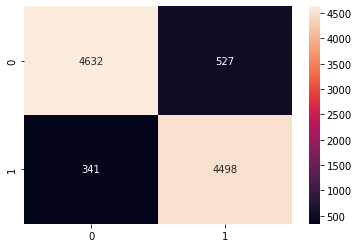

In [97]:
import seaborn as sns
sns.heatmap(conf, annot=True, fmt="d")